# Bucks vs Pacers game analytics:

In [3]:
import json
import matplotlib.pyplot as plt

match_stats = json.load(open("dataset/0022100042.json","r"))

calculate_player_usage = lambda ps, ts : ps /ts

def calculate_rotation_minutes_percent(played_minutes,team_total_minutes):
    convert_60_to_100 = lambda t : t / 60
    player_minutes_f = float(played_minutes.split(":")[0]) if played_minutes != "" else 0.0
    player_seconds_f = convert_60_to_100(float(played_minutes.split(":")[1])) if played_minutes != "" else 0.0
    
    return player_minutes_f + player_seconds_f


## Summary teams' stats comparation

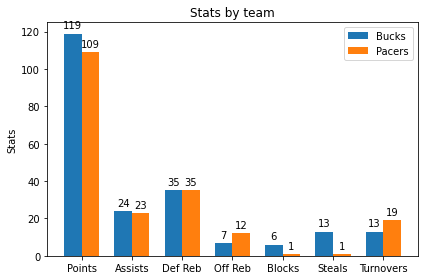

In [4]:
bucks_summary_stats = match_stats["awayTeam"]["statistics"]
pacers_summary_stats = match_stats["homeTeam"]["statistics"]

import numpy as np


labels = ['Points', 'Assists', 'Def Reb','Off Reb', 'Blocks', 'Steals', 'Turnovers']
bucks_stats = [bucks_summary_stats["points"], bucks_summary_stats["assists"], bucks_summary_stats["reboundsDefensive"], bucks_summary_stats["reboundsOffensive"], bucks_summary_stats["blocks"],bucks_summary_stats["steals"],bucks_summary_stats["turnovers"]]
pacers_stats = [pacers_summary_stats["points"], pacers_summary_stats["assists"], pacers_summary_stats["reboundsDefensive"], pacers_summary_stats["reboundsOffensive"], pacers_summary_stats["blocks"],pacers_summary_stats["blocks"],pacers_summary_stats["turnovers"]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar((x - width/ 2), bucks_stats, width, label='Bucks')
rects2 = ax.bar(x + width/2, pacers_stats, width, label='Pacers')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Stats')
ax.set_title('Stats by team')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

## Bucks stats

In [5]:
# save team's stats
bucks_summary_stats = match_stats["awayTeam"]["statistics"]
bucks_indvidual_stats = match_stats["awayTeam"]["players"]

### Bucks scoring proportion

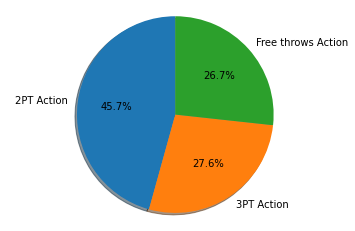

In [6]:
FIELD_GOALS_ATTEMPTS = bucks_summary_stats["fieldGoalsAttempted"]
FREE_THROW_ATTEMPTS = bucks_summary_stats["freeThrowsAttempted"]
SCORE_3PT_ATTEMPTS = bucks_summary_stats["threePointersAttempted"]
SCORE_2PT_ATTEMPTS = FIELD_GOALS_ATTEMPTS-SCORE_3PT_ATTEMPTS
TOTAL_SCORE_ATTEMPTS = FIELD_GOALS_ATTEMPTS+FREE_THROW_ATTEMPTS

SCORING_STATS = [SCORE_2PT_ATTEMPTS,SCORE_3PT_ATTEMPTS,FREE_THROW_ATTEMPTS]
SCORING_LABELS= ["2PT Action","3PT Action","Free throws Action"]

fig1, ax1 = plt.subplots()
ax1.pie(SCORING_STATS,labels=SCORING_LABELS,shadow=True,startangle=90,autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

### Bucks Players' rotation minutes pie chart


12


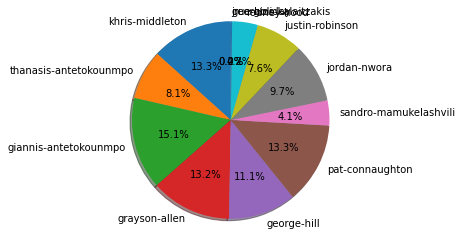

In [7]:
TOTAL_MINUTES = float(bucks_summary_stats["minutes"].replace(":","."))
labels = []
minutes_rotation_percents = []
i = 0
for player in bucks_indvidual_stats:
    labels.append(player["playerSlug"])
    i = i + 1
    minutes_rotation_percents.append(calculate_rotation_minutes_percent(player["statistics"]["minutes"],TOTAL_MINUTES))
print(i)

fig1, ax1 = plt.subplots()
ax1.pie(minutes_rotation_percents,labels=labels,shadow=True,startangle=90,autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

### Bucks players scoring contribute pie chart

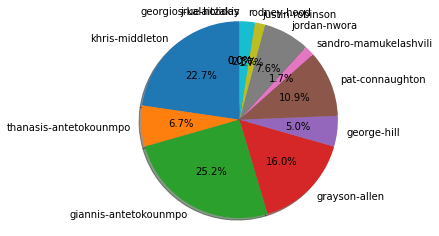

In [8]:
TOTAL_SCORE = int(match_stats["homeTeam"]["score"])

scoring_contributes = [ calculate_player_usage(buck["statistics"]["points"],TOTAL_SCORE) for buck in bucks_indvidual_stats]

fig1, ax1 = plt.subplots()
ax1.pie(scoring_contributes,labels=labels,shadow=True,startangle=90,autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

### Bucks' points, rebounds, assists, blocks, steals, 3pt made leaders, free throws leaders

In [9]:
players_score_dict = {}
players_rebounds_dict = {}
players_assists_dict = {}
players_blocks_dict = {}
players_steals_dict = {}
players_3pt_made_dict = {}
players_free_throws_dict = {}
for player in bucks_indvidual_stats:
    players_score_dict["{}".format(player["playerSlug"])] = player["statistics"]["points"]
    players_rebounds_dict["{}".format(player["playerSlug"])] = player["statistics"]["reboundsTotal"]
    players_assists_dict["{}".format(player["playerSlug"])] = player["statistics"]["assists"]
    players_blocks_dict["{}".format(player["playerSlug"])] = player["statistics"]["blocks"]
    players_steals_dict["{}".format(player["playerSlug"])] = player["statistics"]["steals"]
    if player["statistics"]["threePointersAttempted"] > 1 : 
        players_3pt_made_dict["{}".format(player["playerSlug"])] = player["statistics"]["threePointersPercentage"]
    if player["statistics"]["freeThrowsAttempted"] >= 3 : 
        players_free_throws_dict["{}".format(player["playerSlug"])] = player["statistics"]["freeThrowsPercentage"]
     


score_leader = max(players_score_dict,key=players_score_dict.get)
rebounds_leader = max(players_rebounds_dict,key=players_rebounds_dict.get)
assists_leader = max(players_assists_dict,key=players_assists_dict.get)
blocks_leader = max(players_blocks_dict,key=players_blocks_dict.get)
steals_leader = max(players_steals_dict,key=players_steals_dict.get)
leader_3pt =  max(players_3pt_made_dict,key=players_3pt_made_dict.get)


leader_free_throws = max(players_free_throws_dict,key=players_free_throws_dict.get)
print("Scoring leader:",score_leader)
print("Rebounding leader:",rebounds_leader)
print("Assisting leader:",assists_leader)
print("Blocking leader:",blocks_leader)
print("Stealing leader:",steals_leader)
print("Top 3pt specialist:",leader_3pt)
print("Top free throw specialist:",leader_free_throws)

Scoring leader: giannis-antetokounmpo
Rebounding leader: giannis-antetokounmpo
Assisting leader: giannis-antetokounmpo
Blocking leader: giannis-antetokounmpo
Stealing leader: justin-robinson
Top 3pt specialist: khris-middleton
Top free throw specialist: grayson-allen


### Analyse Giannis play style

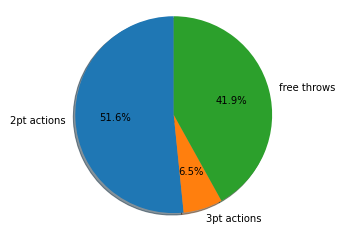

In [10]:
GIANNIS_STATS = bucks_indvidual_stats[2]["statistics"]
GIANNIS_SCORE_ATTEMPTS_SUM = GIANNIS_STATS["fieldGoalsAttempted"]+GIANNIS_STATS["freeThrowsAttempted"]
GIANNIS_2PT_PLAYS = GIANNIS_STATS["fieldGoalsAttempted"] - GIANNIS_STATS["threePointersAttempted"]

GIANNIS_SCORING_STATS = [GIANNIS_2PT_PLAYS, GIANNIS_STATS["threePointersAttempted"],GIANNIS_STATS["freeThrowsAttempted"]]
GIANNIS_SCORING_ACTION = ["2pt actions","3pt actions","free throws"]

fig1, ax1 = plt.subplots()
ax1.pie(GIANNIS_SCORING_STATS,labels=GIANNIS_SCORING_ACTION,shadow=True,startangle=90,autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

### Analyse Kris Midelton game style

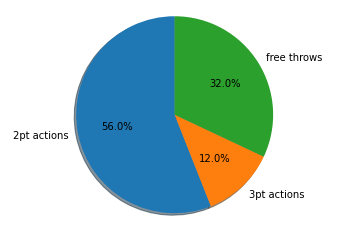

In [11]:
KRIS_STATS = bucks_indvidual_stats[0]["statistics"]
KRIS_SCORE_ATTEMPTS_SUM = KRIS_STATS["fieldGoalsAttempted"]+KRIS_STATS["freeThrowsAttempted"]
KRIS_2PT_PLAYS = KRIS_STATS["fieldGoalsAttempted"] - KRIS_STATS["threePointersAttempted"]

KRIS_SCORING_STATS = [KRIS_2PT_PLAYS, KRIS_STATS["threePointersAttempted"],KRIS_STATS["freeThrowsAttempted"]]
KRIS_SCORING_ACTION = ["2pt actions","3pt actions","free throws"]

fig1, ax1 = plt.subplots()
ax1.pie(KRIS_SCORING_STATS,labels=KRIS_SCORING_ACTION,shadow=True,startangle=90,autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

## Pacers stats:

In [12]:
pacers_summary_stats = match_stats["homeTeam"]["statistics"]
pacers_indvidual_stats = match_stats["homeTeam"]["players"]

### Scoring proportions

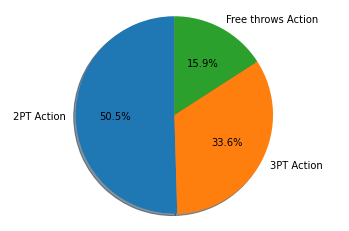

In [13]:
FIELD_GOALS_ATTEMPTS = pacers_summary_stats["fieldGoalsAttempted"]
FREE_THROW_ATTEMPTS = pacers_summary_stats["freeThrowsAttempted"]
SCORE_3PT_ATTEMPTS = pacers_summary_stats["threePointersAttempted"]
SCORE_2PT_ATTEMPTS = FIELD_GOALS_ATTEMPTS-SCORE_3PT_ATTEMPTS
TOTAL_SCORE_ATTEMPTS = FIELD_GOALS_ATTEMPTS+FREE_THROW_ATTEMPTS

SCORING_STATS = [SCORE_2PT_ATTEMPTS,SCORE_3PT_ATTEMPTS,FREE_THROW_ATTEMPTS]
SCORING_LABELS= ["2PT Action","3PT Action","Free throws Action"]

fig1, ax1 = plt.subplots()
ax1.pie(SCORING_STATS,labels=SCORING_LABELS,shadow=True,startangle=90,autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

### Pacers Players' rotation minutes pie chart


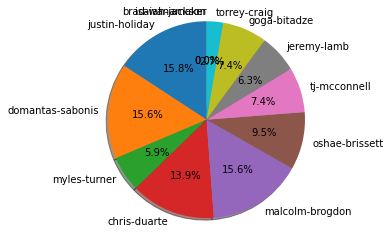

In [14]:
TOTAL_MINUTES = float(pacers_summary_stats["minutes"].replace(":","."))
labels = []
minutes_rotation_percents = []
for player in pacers_indvidual_stats:
    i = i+1
    labels.append(player["playerSlug"])
    minutes_rotation_percents.append(calculate_rotation_minutes_percent(player["statistics"]["minutes"],TOTAL_MINUTES))

fig1, ax1 = plt.subplots()
ax1.pie(minutes_rotation_percents,labels=labels,shadow=True,startangle=90,autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

### Pacers' players score contribute pie chart

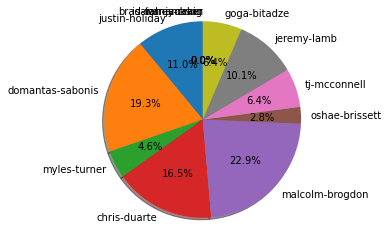

In [16]:
TOTAL_SCORE = int(match_stats["homeTeam"]["score"])

scoring_contributes = [ calculate_player_usage(net["statistics"]["points"],TOTAL_SCORE) for net in pacers_indvidual_stats]

fig1, ax1 = plt.subplots()
ax1.pie(scoring_contributes,labels=labels,shadow=True,startangle=90,autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

### Pacers' points, rebounds, assists, blocks, steals, 3pt made leaders, free throws leaders


In [17]:
players_score_dict = {}
players_rebounds_dict = {}
players_assists_dict = {}
players_blocks_dict = {}
players_steals_dict = {}
players_3pt_made_dict = {}
players_free_throws_dict = {}
for player in pacers_indvidual_stats:
    players_score_dict["{}".format(player["playerSlug"])] = player["statistics"]["points"]
    players_rebounds_dict["{}".format(player["playerSlug"])] = player["statistics"]["reboundsTotal"]
    players_assists_dict["{}".format(player["playerSlug"])] = player["statistics"]["assists"]
    players_blocks_dict["{}".format(player["playerSlug"])] = player["statistics"]["blocks"]
    players_steals_dict["{}".format(player["playerSlug"])] = player["statistics"]["steals"]
    if player["statistics"]["threePointersAttempted"] > 1 : 
        players_3pt_made_dict["{}".format(player["playerSlug"])] = player["statistics"]["threePointersPercentage"]
    if player["statistics"]["freeThrowsAttempted"] >= 3 : 
        players_free_throws_dict["{}".format(player["playerSlug"])] = player["statistics"]["freeThrowsPercentage"]
     


score_leader = max(players_score_dict,key=players_score_dict.get)
rebounds_leader = max(players_rebounds_dict,key=players_rebounds_dict.get)
assists_leader = max(players_assists_dict,key=players_assists_dict.get)
blocks_leader = max(players_blocks_dict,key=players_blocks_dict.get)
steals_leader = max(players_steals_dict,key=players_steals_dict.get)
leader_3pt =  max(players_3pt_made_dict,key=players_3pt_made_dict.get)


leader_free_throws = max(players_free_throws_dict,key=players_free_throws_dict.get)
print("Scoring leader:",score_leader)
print("Rebounding leader:",rebounds_leader)
print("Assisting leader:",assists_leader)
print("Blocking leader:",blocks_leader)
print("Stealing leader:",steals_leader)
print("Top 3pt specialist:",leader_3pt)
print("Top free throw specialist:",leader_free_throws)

Scoring leader: malcolm-brogdon
Rebounding leader: domantas-sabonis
Assisting leader: malcolm-brogdon
Blocking leader: myles-turner
Stealing leader: justin-holiday
Top 3pt specialist: malcolm-brogdon
Top free throw specialist: jeremy-lamb


### Sabonis game style analyse 

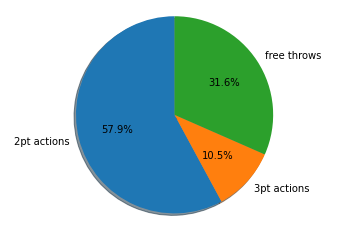

In [18]:
S_STATS = pacers_indvidual_stats[1]["statistics"]
S_SCORE_ATTEMPTS_SUM = S_STATS["fieldGoalsAttempted"]+S_STATS["freeThrowsAttempted"]
S_2PT_PLAYS = S_STATS["fieldGoalsAttempted"] - S_STATS["threePointersAttempted"]

S_SCORING_STATS = [S_2PT_PLAYS, S_STATS["threePointersAttempted"],S_STATS["freeThrowsAttempted"]]
S_SCORING_ACTION = ["2pt actions","3pt actions","free throws"]

fig1, ax1 = plt.subplots()
ax1.pie(S_SCORING_STATS,labels=S_SCORING_ACTION,shadow=True,startangle=90,autopct='%1.1f%%')
ax1.axis('equal')
plt.show()